In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [3]:
data=pd.read_csv('Final.csv',index_col=0)
data.head()

,WIND_SPEED,RAIN,SNOW,SNOW_DEPTH,TAVG,FOG,HEAVY_FOG,THUNDER,HAIL,GLAZE,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,7.83,0.0,0.0,0.0,72,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.83,0.0,0.0,0.0,72,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.83,0.0,0.0,0.0,72,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.83,0.0,0.0,0.0,72,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.83,0.0,0.0,0.0,72,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Y',axis=1), data['Y'], test_size=0.25)

In [5]:
def hyperparameter_tuning(X_train,y_train,cs):
    cs_l1=dict((c,[]) for c in cs)
    cs_l2=dict((c,[]) for c in cs)
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X_train):
        cv_train_x,cv_validate_x= X_train.iloc[train_index],X_train.iloc[test_index]
        cv_train_y,cv_validate_y= y_train.iloc[train_index],y_train.iloc[test_index]
        for c in cs:
            clf_l1=LogisticRegression(penalty='l1',C=c).fit(cv_train_x,cv_train_y)
            cs_l1[c].append(roc_auc_score(cv_validate_y, clf_l1.predict_proba(cv_validate_x)[:,1]))
            clf_l2=LogisticRegression(penalty='l2',C=c).fit(cv_train_x,cv_train_y)
            cs_l2[c].append(roc_auc_score(cv_validate_y, clf_l2.predict_proba(cv_validate_x)[:,1]))
    return (cs_l1,cs_l2)

In [6]:
cs=[10**k for k in range(-5,3)]
acc_l1,acc_l2=hyperparameter_tuning(X_train,y_train,cs)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [7]:
mean_acc_l1=[]
stderr_acc_l1=[]
mean_acc_l2=[]
stderr_acc_l2=[]
mean_l1=0
mean_l2=0
for c in cs:
    x_l1=np.array(acc_l1[c])
    m_l1=np.mean(x_l1)
    v_l1=np.var(x_l1)
    mean_acc_l1.append(m_l1)
    stderr_acc_l1.append(np.sqrt(v_l1/len(x_l1)))
    
    x_l2=np.array(acc_l2[c])
    m_l2=np.mean(x_l2)
    v_l2=np.var(x_l2)
    mean_acc_l2.append(m_l2)
    stderr_acc_l2.append(np.sqrt(v_l2/len(x_l2)))
    
    
mean_acc_l1=np.array(mean_acc_l1)
stderr_acc_l1=np.array(stderr_acc_l1)
mean_acc_l2=np.array(mean_acc_l2)
stderr_acc_l2=np.array(stderr_acc_l2)

Text(0.5, 0, 'c')

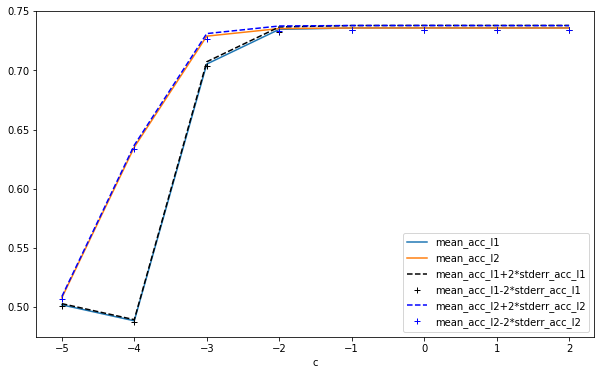

In [8]:
c=np.log10(cs)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
plt.plot(c, mean_acc_l1, label='mean_acc_l1')
plt.plot(c, mean_acc_l2, label='mean_acc_l2')
plt.plot(c, mean_acc_l1+2*stderr_acc_l1, 'k--', label='mean_acc_l1+2*stderr_acc_l1')
plt.plot(c, mean_acc_l1-2*stderr_acc_l1, 'k+',label='mean_acc_l1-2*stderr_acc_l1')
plt.plot(c, mean_acc_l2+2*stderr_acc_l2, 'b--', label='mean_acc_l2+2*stderr_acc_l2')
plt.plot(c, mean_acc_l2-2*stderr_acc_l2, 'b+',label='mean_acc_l2-2*stderr_acc_l2')
plt.legend(loc = 4)
ax.set_xlabel('c')

In [9]:
mean_acc_l1+2*stderr_acc_l1

array([0.50277096, 0.48921457, 0.70736084, 0.73681482, 0.73800332,
       0.7380772 , 0.73807357, 0.73807297])

In [10]:
from sklearn import metrics
lr=LogisticRegression(penalty='l2',C=0.01).fit(X_train,y_train)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_auc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'TP rate')

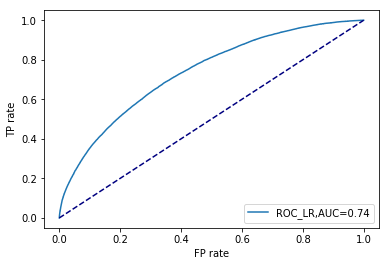

In [20]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)
plt.plot( fpr_lr,tpr_lr, label='ROC_LR,AUC={}'.format(0.74))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc = 4)
ax.set_xlabel('FP rate')
ax.set_ylabel('TP rate')

In [16]:
cm=confusion_matrix(y_test,lr.predict(X_test))
prec=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
f=2*prec*recall/(prec+recall)
print ('FP Rate:{}'.format(cm[0][1]/(cm[0][1]+cm[0][0])))
print ('Precision:{}'.format(prec))
print ('Recall:{}'.format(recall))
print ('FN rate:{}'.format(cm[1][0]/(cm[1][0]+cm[0][0])))
print ('Accuracy:{}'.format(lr.score(X_test,y_test)))
print ('F-Score:{}'.format(f))

FP Rate:0.013687768229708701
Precision:0.6563821846230405
Recall:0.10969271071562227
FN rate:0.1770630897347899
Accuracy:0.8175793568215652
F-Score:0.18797206783525724


In [19]:
target=['0','1']
print (classification_report(y_test,lr.predict(X_test), target_names=target))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    100893
           1       0.66      0.11      0.19     24049

   micro avg       0.82      0.82      0.82    124942
   macro avg       0.74      0.55      0.54    124942
weighted avg       0.79      0.82      0.76    124942

